In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [3]:
#data loading
df = pd.read_csv(r"C:\Users\Python Class\Multiple_Disease_Prediction_p4\kidney_disease - kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# checking missing value
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Handling Mising values

In [7]:
#converting object to numeric
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
#errors='coerce' will make any invalid text become NaN (missing).


In [8]:
# Fill missing numerical values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [9]:
# 2. Fill categorical columns with mode (most frequent value)
categorical_cols = ['rbc', 'pc', 'pcc', 'ba','htn', 'dm', 'cad', 'appet', 'pe', 'ane']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [10]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
#statical measures about data
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,199.500000,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [12]:
#distribution of target 
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [13]:
# grouping the data based on the target var
df.groupby('classification').mean(numeric_only=True)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
classification,,,,,,,,,,,,,,,
ckd,124.5,54.443468,79.498763,1.014505,1.606780,0.711225,171.257551,71.610938,4.350478,135.091431,4.795045,10.993264,34.533046,8806.824490,4.323288
notckd,324.5,46.549889,71.419588,1.022247,0.033898,0.015005,109.334794,33.783696,0.942415,141.590958,4.347575,15.081724,46.136920,7738.285714,5.347680


Data Pre-Processing

Encoding - rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane

One-hot Encoding

In [14]:
#One-hot Encoding - rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
df = df.join(pd.get_dummies(df['rbc'], prefix='rbc')).drop('rbc', axis=1)
df = df.join(pd.get_dummies(df['pc'], prefix='pc')).drop('pc', axis=1)
df = df.join(pd.get_dummies(df['pcc'], prefix='pcc')).drop('pcc', axis=1)
df = df.join(pd.get_dummies(df['ba'], prefix='ba')).drop('ba', axis=1)
df = df.join(pd.get_dummies(df['htn'], prefix='htn')).drop('htn', axis=1)
df = df.join(pd.get_dummies(df['dm'], prefix='dm')).drop('dm', axis=1)
df = df.join(pd.get_dummies(df['cad'], prefix='cad')).drop('cad', axis=1)
df = df.join(pd.get_dummies(df['appet'], prefix='appet')).drop('appet', axis=1)
df = df.join(pd.get_dummies(df['pe'], prefix='pe')).drop('pe', axis=1)
df = df.join(pd.get_dummies(df['ane'], prefix='ane')).drop('ane', axis=1)

df = df.map(lambda x: 1 if x is True else 0 if x is False else x)
df.head(5)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification,rbc_abnormal,rbc_normal,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,ckd,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,ckd,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,ckd,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,ckd,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,ckd,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [15]:
df = df.drop('id',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

#Separating feature and target
x, y = df.drop('classification',axis=1),df['classification']
# axis =1 when dropping a column
# axis = 0 when dropping a row


# Splitting data to training data & test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#scaling -Data standardization - what change all value in same range
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#model training
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(x_train,y_train)

#Model Evaluation - will find accuracy score
#accuracy score on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train ,x_train_prediction)
print("Accuracy score of training data :",training_data_accuracy)
#accuracy score on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test ,x_test_prediction)
print("Accuracy score of test data :",test_data_accuracy)


Accuracy score of training data : 1.0
Accuracy score of test data : 1.0


In [23]:
# # Perform Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.9875 1.     0.9875 0.9875 1.    ]
Mean accuracy: 0.9925


Feature Importance

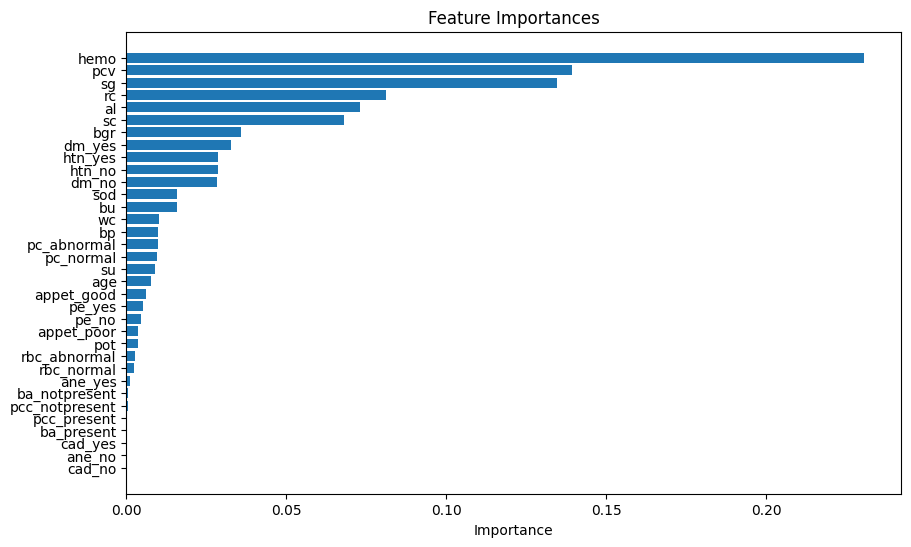

In [ ]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()

Saving the trained model

In [28]:
import pickle
filename = "kidney_disease_trained_model.sav"
pickle.dump(model, open(filename, 'wb'))
#loading the saved model
loaded_model = pickle.load(open('kidney_disease_trained_model.sav','rb'))

In [29]:
for column in x.columns:
    print(column)

age
bp
sg
al
su
bgr
bu
sc
sod
pot
hemo
pcv
wc
rc
rbc_abnormal
rbc_normal
pc_abnormal
pc_normal
pcc_notpresent
pcc_present
ba_notpresent
ba_present
htn_no
htn_yes
dm_no
dm_yes
cad_no
cad_yes
appet_good
appet_poor
pe_no
pe_yes
ane_no
ane_yes
